# fig1 플롯

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import ta

In [2]:
data_df=web.DataReader('000660.KS', 'yahoo', '2019-02-01', '2020-06-20').reset_index()
ma = [5,20,60,120]
for days in ma:
    data_df['ma_'+str(days)] = data_df['Close'].rolling(window = days).mean()

data_df['MACD'] = ta.trend.macd(data_df['Close'])
data_df_10days=data_df.iloc[271:281,:]

In [3]:
data_df_10days['Date']=data_df_10days['Date'].astype(str)

data_df_10days = data_df_10days[['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'ma_5',
       'ma_20', 'ma_60', 'ma_120', 'MACD']]

data_df_10days.columns = ['거래일', '고가', '저가', '시가', '종가', '거래량', '5일 이동평균선',
       '20일 이동평균선', '60일 이동평균선', '120일 이동평균선', 'MACD']
data_df_10days[['고가', '저가', '시가', '종가', '거래량']] = data_df_10days[['고가', '저가', '시가', '종가', '거래량']].astype(int)

/tmp/ipykernel_1083483/2863874721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_10days['Date']=data_df_10days['Date'].astype(str)
/tmp/ipykernel_1083483/2863874721.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_10days[['고가', '저가', '시가', '종가', '거래량']] = data_df_10days[['고가', '저가', '시가', '종가', '거래량']].astype(int)


In [4]:
index_lst = ['D-10', 'D-9', 'D-8', 'D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1']
data_df_10days.index = index_lst

In [9]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 6)
data_df_10days.T

,D-10,D-9,D-8,...,D-3,D-2,D-1
거래일,2020-03-11,2020-03-12,2020-03-13,...,2020-03-20,2020-03-23,2020-03-24
고가,88500,84600,84700,...,76200,71600,78800
저가,85100,79600,76000,...,70100,68000,72100
시가,88200,83800,76900,...,71800,69700,73000
종가,85500,82800,82500,...,74800,69400,78700
...,...,...,...,...,...,...,...
5일 이동평균선,90940.0,88520.0,86500.0,...,75580.0,73340.0,73000.0
20일 이동평균선,96535.0,95575.0,94475.0,...,87495.0,85990.0,85025.0
60일 이동평균선,96283.333333,96273.333333,96183.333333,...,94765.0,94345.0,94093.333333
120일 이동평균선,88926.666667,88955.0,88974.166667,...,88681.666667,88565.833333,88543.333333


In [6]:
data_df=web.DataReader('000660.KS', 'yahoo', '2020-01-01', '2020-05-20')

Text(0, 0.5, 'Price')

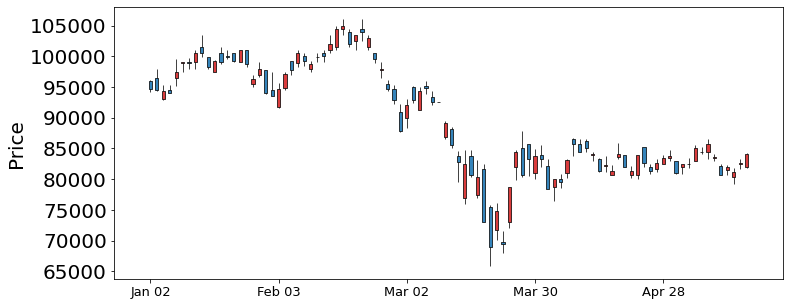

In [7]:
# date_lst = ['D-9', 'D-8', 'D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1', 'D-0', 'D+1']
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors=colorset)
fig, ax = plt.subplots(1,1,figsize=(12,5))
mpf.plot(data_df, type = 'candle',style=s,ax=ax)
# ax.set_xticks(range(11))
# ax.set_xticklabels(date_lst, fontsize=18, rotation=30)

_=plt.yticks(fontsize=20)
_=plt.xticks(fontsize=13, rotation=0)
ax.set_ylabel('Price', fontsize=20)
# ax.set_xlabel('10 days data for predict', fontsize=20)

# scaling fig

In [10]:
data_df=web.DataReader('000660.KS', 'yahoo', '2019-01-01', '2020-03-24')
min_240=data_df['Close'].rolling(window=240).min().iloc[-1]
max_240=data_df['Close'].rolling(window=240).max().iloc[-1]
data_df_10=data_df.iloc[-10:,:]
data_df_10_for_scaling4=data_df.iloc[-11:-1,:]
scaling1_df=(data_df_10-min_240)/(max_240-min_240)

min_10 = data_df_10.iloc[:,:4].min().min()
max_10 = data_df_10.iloc[:,:4].max().max()
scaling2_df=(data_df_10-min_10)/(max_10-min_10)

close_10 = data_df_10.iloc[-1,:]['Close']
scaling3_df = (data_df_10/close_10) - 1

scaling4_df = data_df_10.copy()
for i in range(10):
    scaling4_df.iloc[i,:4] = (scaling4_df.iloc[i,:4]/data_df_10_for_scaling4['Close'][i]) - 1

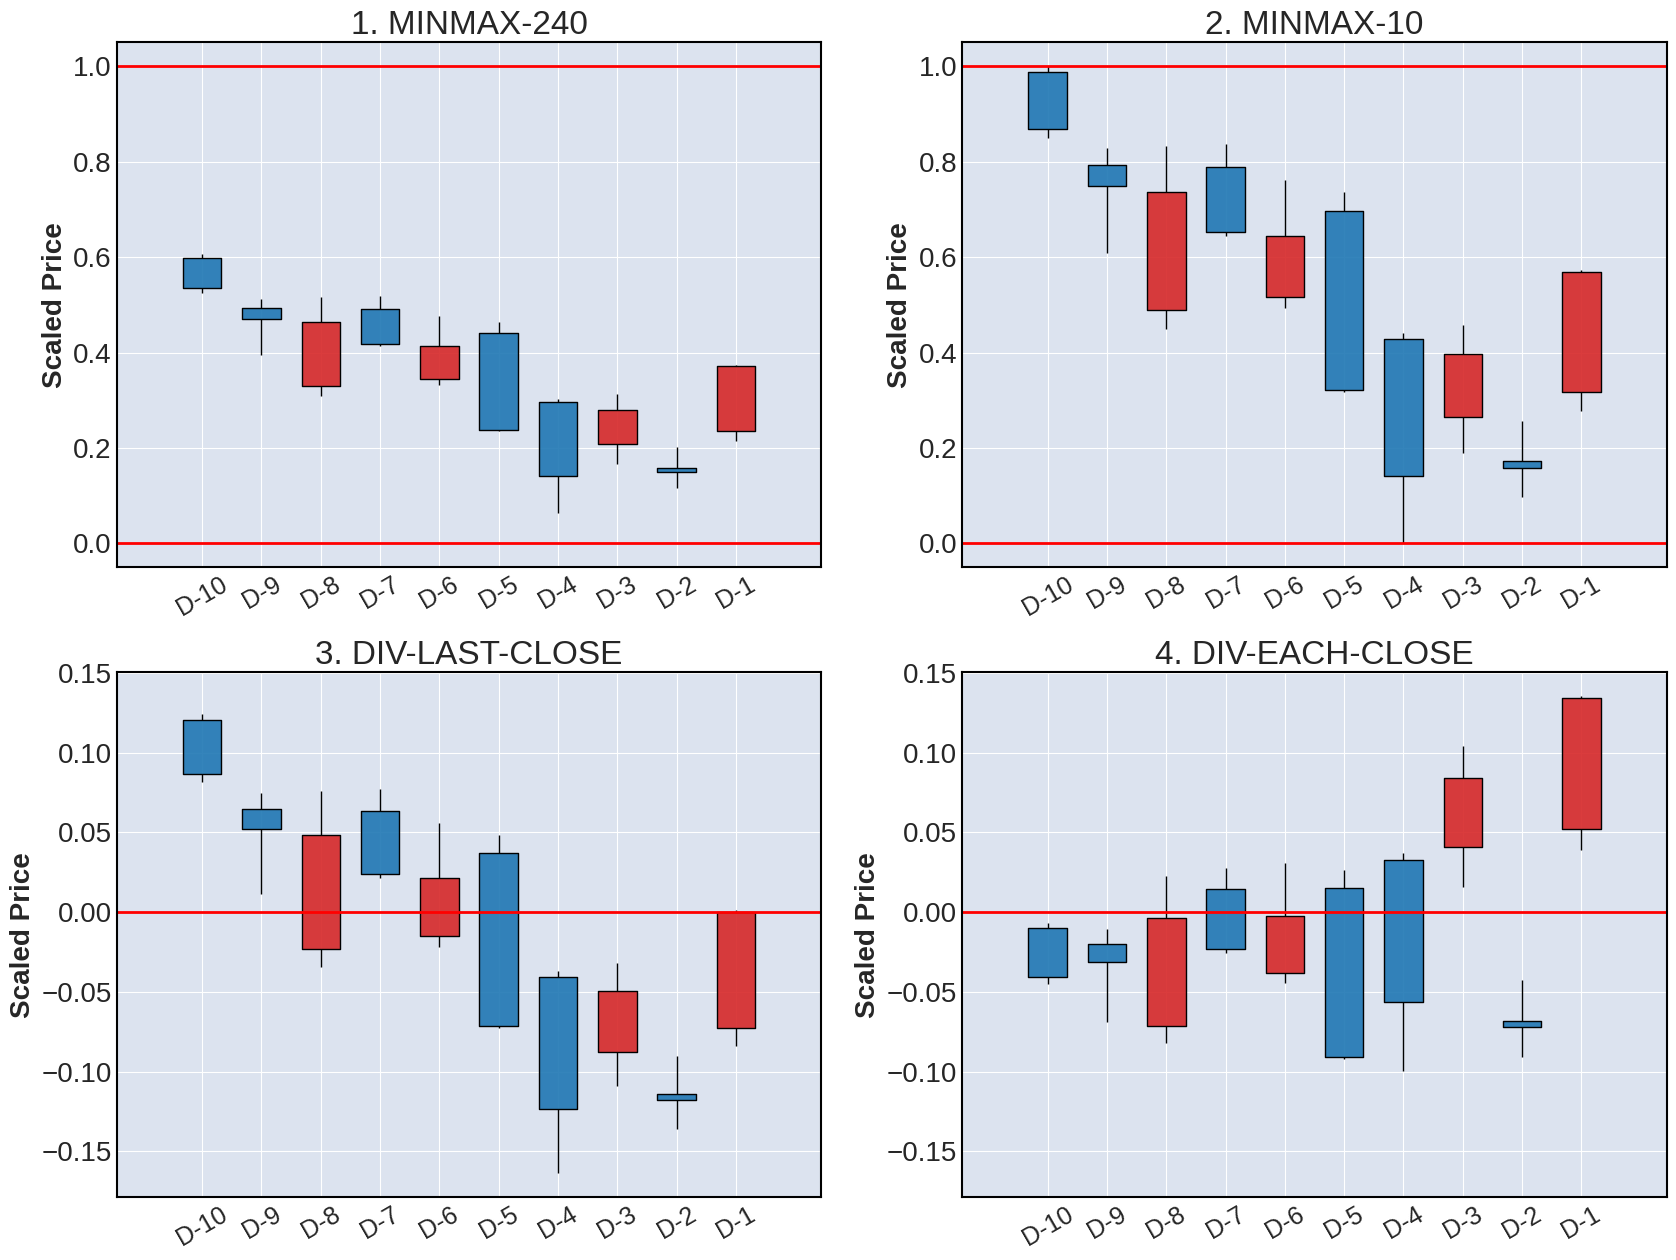

In [11]:
date_lst = ['D-10', 'D-9', 'D-8', 'D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1']
data_lst = [scaling1_df,scaling2_df,scaling3_df,scaling4_df]
scaling_lst = ['1. MINMAX-240','2. MINMAX-10','3. DIV-LAST-CLOSE','4. DIV-EACH-CLOSE']
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors=colorset)
fig = mpf.figure(figsize=(20, 15))#, style=s) # pass in the self defined style to the whole canvas
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4, sharex=ax3, sharey=ax3)
ax_lst=[ax1,ax2,ax3,ax4]
for i,ax in enumerate(ax_lst):
    mpf.plot(data_lst[i], type = 'candle',style=s, ax=ax)
    ax.set_xticks(range(10))
    ax.set_xticklabels(date_lst, fontsize=18, rotation=30)
    
    ax.set_title(scaling_lst[i],fontsize=24)

    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel('Scaled Price', fontsize=20)
    if i <= 1:
        ax.axhline(1,color='r')
        ax.axhline(0,color='r')
        
    elif i==3:
        ax.axhline(0,color='r')
#         ax.axhline(0.3,color='r')
#         ax.axhline(-0.3,color='r')

    else:
        ax.axhline(0,color='r')
    


### 4번 스케일링 플롯

In [88]:
data_df_10_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-22,820000,798000,807000,811000,85163,796102.6875
2020-10-23,816000,791000,816000,796000,80718,781378.1875
2020-10-26,809000,788000,794000,796000,49132,781378.1875
2020-10-27,800000,780000,785000,782000,81633,767635.3750
2020-10-28,803000,775000,776000,802000,78286,787268.0000
2020-10-29,815000,793000,795000,813000,88029,798065.9375
2020-10-30,813000,774000,811000,776000,92285,761745.6250
2020-11-02,795000,777000,782000,778000,48696,763708.8750
2020-11-03,792000,778000,778000,782000,48350,767635.3750


In [89]:
data_df=web.DataReader('036570.KS', 'yahoo', '2020-05-29', '2020-11-05')
data_df_10_df = data_df[-11:]
data_df_10_lst = data_df[-11:].values.tolist()
close_lst = data_df[-12:-1]['Close']

result2 = []
for i,(row, close_value) in enumerate(zip(data_df_10_lst, close_lst)):
    result = []
    for price in row[:4]:
        result += [(price/close_value)-1]
    result2.append( result )

In [90]:
scaled_data_df = pd.DataFrame(result2, columns=['High','Low','Open','Close'])

In [94]:
scaled_data_df.index = data_df_10_df.index
scaled_data_df.iloc[-1,:]=[0,0,0,0]
scaled_data_df

,High,Low,Open,Close
Date,,,,
2020-10-22,0.013597,-0.013597,-0.002472,0.002472
2020-10-23,0.006165,-0.024661,0.006165,-0.018496
2020-10-26,0.016332,-0.010050,-0.002513,0.000000
2020-10-27,0.005025,-0.020101,-0.013819,-0.017588
2020-10-28,0.026854,-0.008951,-0.007673,0.025575
2020-10-29,0.016209,-0.011222,-0.008728,0.013716
2020-10-30,0.000000,-0.047970,-0.002460,-0.045510
2020-11-02,0.024485,0.001289,0.007732,0.002577
2020-11-03,0.017995,0.000000,0.000000,0.005141


Text(0, 0.5, 'Scaled Price')

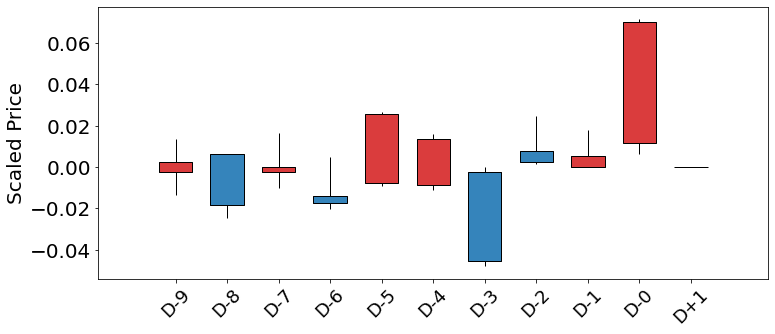

In [95]:
date_lst = ['D-9', 'D-8', 'D-7', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'D-1', 'D-0', 'D+1']
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors=colorset)
fig, ax = plt.subplots(1,1,figsize=(12,5))
mpf.plot(scaled_data_df, type = 'candle',style=s,ax=ax)
ax.set_xticks(range(11))
ax.set_xticklabels(date_lst, fontsize=18)

_=plt.yticks(fontsize=20)
ax.set_ylabel('Scaled Price', fontsize=20)